# $$ \textbf{Yüklü Çubuğun Elektrik Alanının Python İle Hesabı}$$

# $$\vec E = \frac{1}{4\pi\epsilon_{0}} \frac{q}{r^2}\hat r $$
# $$ \vec E = \frac{1}{4\pi\epsilon_{0}} \frac{q}{r^3}\vec r $$
# $$  \vec E = \frac{1}{4\pi\epsilon_{0}} \int \frac{\vec r - \vec r'}{|\vec r - \vec r'|^3}dq  $$
## yüklü bir çubuğu incelemek için tek boyutlu bir yük dağılımı oluşturmak yeterli olacaktır.
## $ \text{Çubuk İçin Bir Boyutlu Yük Dağılımı:} $
# $$ \lambda = \frac{Q}{L} = \frac{dq}{dy}, dq = \lambda dy $$
    
# $$ \vec E = \frac{1}{4\pi\epsilon_{0}} \int \frac{\lambda}{|\vec r - \vec r'|^3}(\vec r - \vec r') dr  $$
# $\vec r' Nerede?$
## $ \vec r' \rightarrow <0,t> -a \le t \le a$ Tahmin edeceğiniz gibi çubuğun x'i aynı iken y si sürekli değişmekte, z si ise olmamaktadır. L = 2a, a = 2, L = 4

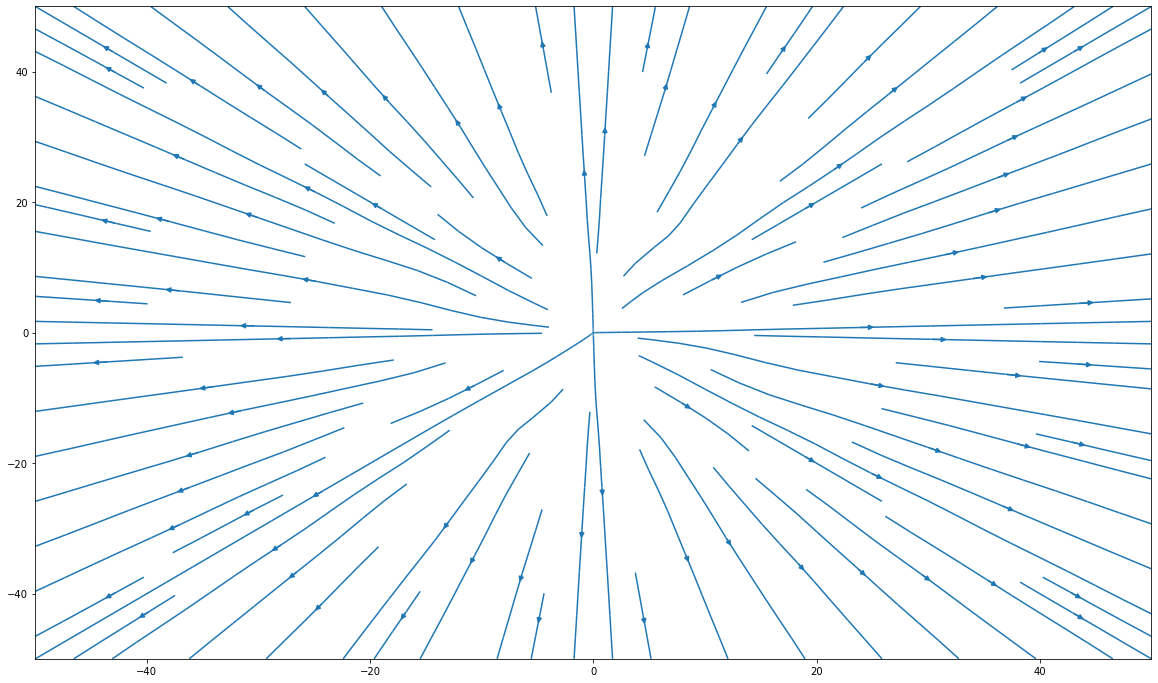

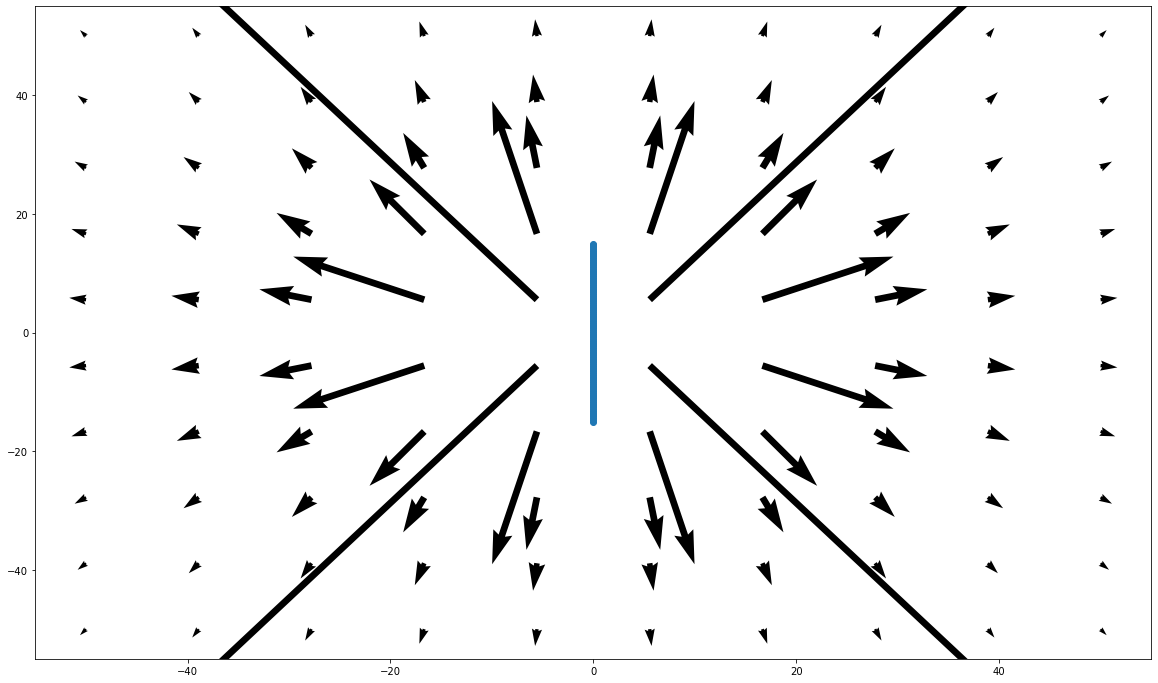

In [68]:
import numpy as np
import scipy as sp
from scipy.integrate import quad
import sympy as smp
import matplotlib.pyplot as plt


# sembolik hesap için sembollerimizi tanımlayalım

t = smp.symbols('t')
x,y,a,Q = smp.symbols('x y a Q')
r = smp.Matrix([x,y]) #uzaydaki bir noktanın konumu
rp = smp.Matrix([0,t]) # r', çubuğumuzdaki bir noktanın konumu, bir çubukla uğraştığımız için çubuğun x lokasyonuna 0 verdim
sep = r - rp # çubuktaki bir nokta ile uzaydaki bir nokta arasındaki mesafe
#drpdt = smp.diff(rp,t).norm() # dr'/dt
lamb = 1.6*10**-19/30 #lambda mız bu olsun => Q = 1.6e-19 Coulomb , L = 4 metre

integrand = lamb * sep/sep.norm()**3 * (8.99*10**9) #integral sembolümün içerisi

dExdt = smp.lambdify([t,x,y], integrand[0])
dEydt = smp.lambdify([t,x,y], integrand[1])

def E(x,y): # elektrik alan dedğimiz şeyi tanımlayalım
    return np.array([quad(dExdt, -2, 2, args =(x,y))[0],
                     quad(dEydt, -2, 2, args =(x,y))[0] 
                    ])

# grafik sınırlarını tanımlayalım
X = np.linspace(-50,50,10)
Y = np.linspace(-50,50,10)
U,V = np.meshgrid(X,Y)

#Vektör alanımızı tanımlayalım
Efield = np.vectorize(E, signature = '(),()->(n)')(U,V)
Ex = Efield[:,:,0]
Ey = Efield[:,:,1]

plt.figure(figsize = (20,12))
plt.streamplot(U,V,Ex,Ey)

plt.figure(figsize = (20,12))
plt.quiver(U,V,Ex,Ey)
plt.scatter(np.zeros(100),np.linspace(-15,15,100))